4A. Generate 61 points fortarget = sin x , where x ∈ [−3, 3]. Use this dataset to train
two layer neural networks using gradient descent learning algorithm. Draw two curves with
different colours, for target and output(y) of the trained neural network.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate dataset
np.random.seed(0)
X = np.linspace(-3, 3, 61).reshape(-1, 1)
y = np.sin(X)

In [ ]:
# Define neural network architecture
input_size = 1
hidden_size = 10
output_size = 1
learning_rate = 0.01
epochs = 1000

In [ ]:
# Initialize weights and biases
np.random.seed(0)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [ ]:
# Define sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)
    output = np.dot(hidden_output, W2) + b2

    # Compute loss
    loss = np.mean((output - y) ** 2)

    # Backpropagation
    d_output = 2 * (output - y) / len(X)
    d_hidden_output = np.dot(d_output, W2.T)
    d_hidden_input = d_hidden_output * sigmoid_derivative(hidden_output)

    # Update weights and biases
    W2 -= learning_rate * np.dot(hidden_output.T, d_output)
    b2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    W1 -= learning_rate * np.dot(X.T, d_hidden_input)
    b1 -= learning_rate * np.sum(d_hidden_input, axis=0, keepdims=True)


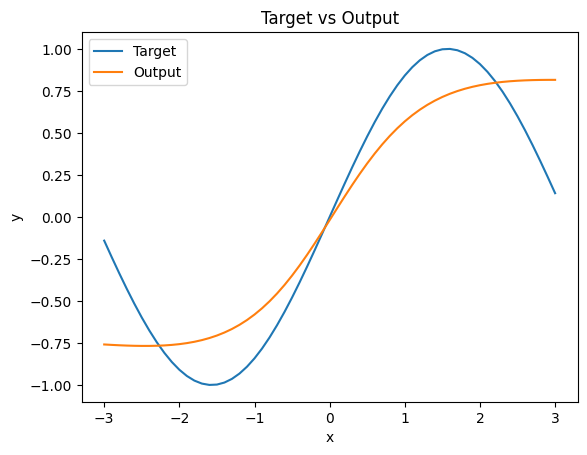

In [ ]:
# Plot target and output curves
plt.plot(X, y, label='Target')
plt.plot(X, output, label='Output')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Target vs Output')
plt.legend()
plt.show()

4B.Use MNIST dataset to train neural networks using gradient descent learning
algorithm.Experiments with various Architectures of neural networks, and with different
activation functions for hidden and output layers.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Load MNIST dataset from CSV files
train_data = pd.read_csv('/content/mnist_train.csv')
test_data = pd.read_csv('/content/mnist_test.csv')

In [ ]:
# Extract features and labels
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

In [ ]:
# Normalize features
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Reshape features
X_train = X_train.reshape(-1, 28, 28)  # Reshape to 28x28 images
X_test = X_test.reshape(-1, 28, 28)

In [ ]:
# Define neural network architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
162/162 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.5037 - val_loss: nan - val_accuracy: 0.1150
Epoch 2/5
162/162 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0977 - val_loss: nan - val_accuracy: 0.1150
Epoch 3/5
162/162 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0977 - val_loss: nan - val_accuracy: 0.1150
Epoch 4/5
162/162 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0977 - val_loss: nan - val_accuracy: 0.1150
Epoch 5/5
181/181 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0939
Test accuracy: 0.09393414109945297
